In [2]:
#구현 파일 실행시키기
%run cnn_reg_model.ipynb
%run dataset_flowers.ipynb
%run dataset_office31.ipynb

In [3]:
#실험용 데이터셋 객체 생성  //  이미지해상도 [96,96], 신경망 입력 형태 [96,96,3]으로 지정
#이미지 해상도를 [96,96]으로 한 이유는 여러 단계의 풀링 계층을 거치면서 짜투리 없는 분할이 쉬운 숫자를 택한 것
#신경망 입력 형태[96,96,3]의 3차원 형태로 지정한 것은 신경망 입력이 다층 퍼셉트론을 위한 2차원 행렬 모양이 아닌
#합성곱 신경망을 위한 4차원 텐서가 되도록 하기 위함 -> 실제학습 때 신경망 입력은 미니배치 축이 추가되어 합성곱 신경망의 처리에 적합한 4차원 형태로 준비됌
fd = FlowersDataset([96, 96], [96, 96, 3])
od = Office31Dataset([96, 96], [96, 96, 3])

Model flowers_model_1 train started:
    Epoch 2: cost=1.600, accuracy=0.246/0.230 (48/48 secs)
    Epoch 4: cost=1.598, accuracy=0.246/0.250 (45/93 secs)
    Epoch 6: cost=1.598, accuracy=0.246/0.260 (43/136 secs)
    Epoch 8: cost=1.598, accuracy=0.246/0.250 (43/179 secs)
    Epoch 10: cost=1.598, accuracy=0.246/0.240 (43/222 secs)
Model flowers_model_1 train ended in 222 secs:
Model flowers_model_1 test report: accuracy = 0.232, (1 secs)

Model flowers_model_1 Visualization


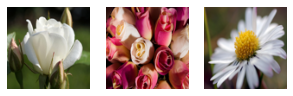

추정확률분포 [18,25,18,17,23] => 추정 dandelion : 정답 rose => X
추정확률분포 [18,25,18,17,23] => 추정 dandelion : 정답 rose => X
추정확률분포 [18,25,18,17,23] => 추정 dandelion : 정답 daisy => X


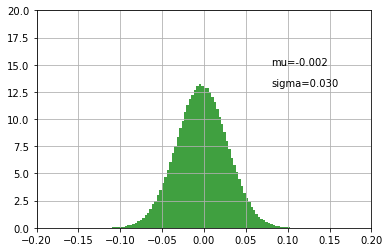

Near 0 parameters =  0.0%(232/829790)


In [3]:
#베이스라인 모델의 파라미터 분포 확인
fm1 = CnnRegModel('flowers_model_1', fd, [30,10])
fm1.exec_all(epoch_count=10, report=2, show_params=True)

Model flowers_model_2 train ended in 950 secs:
Model flowers_model_2 test report: accuracy = 0.232, (1 secs)



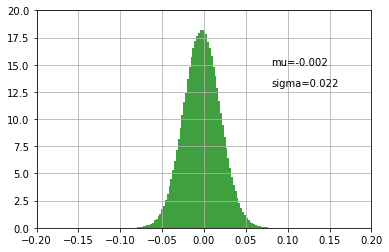

Near 0 parameters =  0.0%(328/829790)


In [4]:
#L2손실의 효과와 파라미터 분포의 변화 확인
#히스토그램에서 보이는 것처럼 0을 중심으로 파라미터값이 확연하게 모여들면서 평균이 -0.002, 표준편차가 0.022로 변화함
#L2손실이 적용되면서 표준편차 감소가 1/10도 안되게 크게 줄음 -> 전체적으로 파라미터들의 절댓값이 크게 줄었음을 의미
fm2 = CnnRegModel('flowers_model_2', fd, [30,10], l2_decay=0.1)
fm2.exec_all(epoch_count=10, show_cnt=0, show_params=True)

Model flowers_model_3 train ended in 1197 secs:
Model flowers_model_3 test report: accuracy = 0.232, (1 secs)



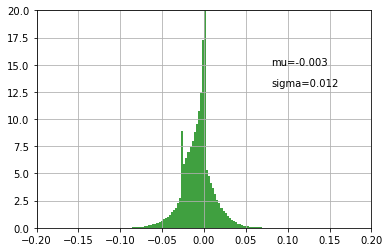

Near 0 parameters = 60.1%(498824/829790)


In [5]:
#L1손실의 효과와 파라미터 분포의 변화 확인
#히스토그램 모야이 비틀린 모양으로 변화했고,파라미터들의 표준편차가 0.012로 줄어들고 0 부분의 확률밀도가 매우 커짐
#전체 파라미터의 무려 60.1%가 0에 가까운 값을 갖는 것으로 나타남 -> L1손실이 확실한 효과를 발휘하고 있음을 보임
fm3 = CnnRegModel('flowers_model_3', fd, [30,10], l1_decay=0.01)
fm3.exec_all(epoch_count=10, show_cnt=0, show_params=True)

Model flowers_cnn_1 train started:
    Epoch 2: cost=1.092, accuracy=0.578/0.530 (234/234 secs)
    Epoch 4: cost=0.899, accuracy=0.654/0.600 (237/471 secs)
    Epoch 6: cost=0.777, accuracy=0.708/0.630 (279/750 secs)
    Epoch 8: cost=0.700, accuracy=0.736/0.620 (301/1051 secs)
    Epoch 10: cost=0.598, accuracy=0.775/0.650 (276/1327 secs)
Model flowers_cnn_1 train ended in 1328 secs:
Model flowers_cnn_1 test report: accuracy = 0.632, (213 secs)

Model flowers_cnn_1 Visualization


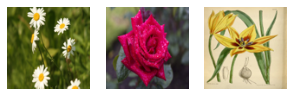

추정확률분포 [83,13, 2, 1, 1] => 추정 daisy : 정답 daisy => O
추정확률분포 [ 0, 0,99, 0, 0] => 추정 rose : 정답 rose => O
추정확률분포 [ 5,18,31,33,12] => 추정 sunflower : 정답 tulip => X


In [9]:
#베이스라인 합성곱 신경망의 성능 확인
#드롭아웃,잡음 주입, 배치 정규화의 세 가지 계층들을 이용할 때와의 성능 비교를 위해 먼저 정규화 기법을 적용하지 않은 신경망의 성능 확인
cnn1 = [['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
fcnn1 = CnnRegModel('flowers_cnn_1', fd, cnn1)
fcnn1.exec_all(epoch_count=10, report=2)

In [5]:
#드롭아웃 기법의 동작과 효과 확인
#합성곱 계층과 풀링 계층의 처리가 끝날 때마다 60%만 살리고 나머지 40%를 0으로 만들어 걸러내는 드롭아웃 계층을 삽입
#정확도가 63.2% -> 46.6%로 떨어짐 학습 과정에 일부러 부담을 주는 것이기 때문
#드롭아웃의 초기 부담을 극복하고 더 나은 결과를 얻어내려면 더 많은 학습 횟수가 필요하며 모델의 용량을 일부 늘리는 방안도 생각해볼 수 있다.
cnn2 = [['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['dropout', {'keep_prob':0.6}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['dropout', {'keep_prob':0.6}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}],
        ['dropout', {'keep_prob':0.6}]]
fcnn2 = CnnRegModel('flowers_cnn_2', fd, cnn2)
fcnn2.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_2 train started:
    Epoch 2: cost=1.230, accuracy=0.486/0.410 (467/467 secs)
    Epoch 4: cost=1.056, accuracy=0.584/0.510 (263/730 secs)
    Epoch 6: cost=0.990, accuracy=0.607/0.570 (253/983 secs)
    Epoch 8: cost=0.945, accuracy=0.633/0.430 (247/1230 secs)
    Epoch 10: cost=0.903, accuracy=0.635/0.500 (268/1498 secs)
Model flowers_cnn_2 train ended in 1498 secs:
Model flowers_cnn_2 test report: accuracy = 0.466, (145 secs)



In [6]:
#잡음 주입 기법의 동작과 효과 확인
#잡음 주입 모델의 학습 진행은 베이스라인과 앞서거니 뒤서거니 하는 모습을 보이며 손실값 또한 계속 하락하고 있다.
#주입되는 잡음크기를 잘 바꾸어보고 학습 횟수를 적절히 늘리면 베이스라인의 결과를 넘어서는 좋은 결과를 거둘 수 있을것으로 기대된다.
noise_std = 0.01
cnn3 = [['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
fcnn3 = CnnRegModel('flowers_cnn_3', fd, cnn3)
fcnn3.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_3 train started:
    Epoch 2: cost=1.068, accuracy=0.576/0.540 (273/273 secs)
    Epoch 4: cost=0.908, accuracy=0.653/0.680 (249/522 secs)
    Epoch 6: cost=0.792, accuracy=0.696/0.660 (258/780 secs)
    Epoch 8: cost=0.691, accuracy=0.742/0.590 (407/1187 secs)
    Epoch 10: cost=0.582, accuracy=0.785/0.610 (266/1453 secs)
Model flowers_cnn_3 train ended in 1453 secs:
Model flowers_cnn_3 test report: accuracy = 0.653, (181 secs)



In [7]:
#배치 정규화 기법의 동작과 효과 확인
#베이스라인보다 상당히 떨어진 53.5%의 정확도가 나타났다.
#배치 정규화 처리는 합성곱 계층 안에 삽입되어 선형 연산과 비선형 활성화 함수의 중간에서 작동하는 편이 더 나은 결과를 낸다는 견해도 있다.->그 방법은 9장에서
cnn4 = [['batch_normal'],
        ['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['batch_normal'],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['batch_normal'],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
fcnn4 = CnnRegModel('flowers_cnn_4', fd, cnn4)
fcnn4.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_4 train started:
    Epoch 2: cost=1.054, accuracy=0.587/0.520 (653/653 secs)
    Epoch 4: cost=0.883, accuracy=0.672/0.310 (293/946 secs)
    Epoch 6: cost=0.770, accuracy=0.713/0.330 (316/1262 secs)
    Epoch 8: cost=0.719, accuracy=0.725/0.540 (326/1588 secs)
    Epoch 10: cost=0.628, accuracy=0.770/0.620 (265/1853 secs)
Model flowers_cnn_4 train ended in 1853 secs:
Model flowers_cnn_4 test report: accuracy = 0.535, (163 secs)



In [10]:
#오피스31 문제에 대한 정규화 기법의 효과 확인
#순서대로 베이스라인,드롭아웃,잡음 주입,배치 정규화 순으로 도입했다.
#전체적으로 정규화 기법의 효과가 바로 눈에 띄게 나타나지는 않았고 오히려 정확도가 하락하였다.
#정규화 기법은 의도적으로 학습을 방해하는 장애물을 추가하는 것이다.
#정규화 기법의 도입 효과는 대체로 많은 양의 데이터를 가지고 커다란 모델을 구성하여 학습 횟수를 늘려서 학습시킬 때 중요한 역할을 한다.
ocnn1 = CnnRegModel('office31_cnn_1', od, cnn1)
ocnn2 = CnnRegModel('office31_cnn_2', od, cnn2)
ocnn3 = CnnRegModel('office31_cnn_3', od, cnn3)
ocnn4 = CnnRegModel('office31_cnn_4', od, cnn4)

ocnn1.exec_all(epoch_count=10, show_cnt=0)
ocnn2.exec_all(epoch_count=10, show_cnt=0)
ocnn3.exec_all(epoch_count=10, show_cnt=0)
ocnn4.exec_all(epoch_count=10, show_cnt=0)

Model office31_cnn_1 train ended in 1158 secs:
Model office31_cnn_1 test report: accuracy = 0.907+0.557, (165 secs)

Model office31_cnn_2 train ended in 1417 secs:
Model office31_cnn_2 test report: accuracy = 0.323+0.496, (231 secs)

Model office31_cnn_3 train ended in 1301 secs:
Model office31_cnn_3 test report: accuracy = 0.896+0.542, (225 secs)

Model office31_cnn_4 train ended in 1549 secs:
Model office31_cnn_4 test report: accuracy = 0.878+0.410, (503 secs)

